In [17]:
# Importing Necesarry Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:
#Loading  and exploring  the dataset Stock.csv :

data = pd.read_csv("Stock.csv")


# The Stock.csv file contain : Date , Open , High , Low , Close , Adj Close and  Volume Column
# Where , Date Describes the Date of entry made in System
# Open is the unit of Stocks buyed  when  Stock was First Opened
# High is the Highest Unit  Gained
# Low is the Lowest Unit lossed
# Close and Adj Close is the Closing and Adjacent Closing
# Volume in Simple Words is the Amount in the Portfolio


# Display basic information about the data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB
None


In [19]:
print(data.describe())


             Open        High         Low       Close   Adj Close  \
count  184.000000  184.000000  184.000000  184.000000  184.000000   
mean   127.040245  129.918098  124.340381  127.352663  123.838032   
std     24.314449   24.577906   24.176736   24.356534   25.655569   
min     92.389999   93.769997   89.470001   90.519997   87.796822   
25%    108.882499  112.362499  106.152502  109.204998  105.301765   
50%    118.895000  120.865002  116.870003  119.190002  114.999730   
75%    144.935005  147.695000  143.227493  144.704994  143.039467   
max    180.289993  183.500000  177.619995  179.979996  179.979996   

             Volume  
count  1.840000e+02  
mean   1.910168e+08  
std    8.160281e+07  
min    3.839850e+07  
25%    1.273706e+08  
50%    1.744112e+08  
75%    2.207755e+08  
max    5.003630e+08  


In [20]:
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  29-09-2014  100.589996  100.690002   98.040001   99.620003   93.514290   
1  06-10-2014   99.949997  102.379997   98.309998  100.730003   94.556244   
2  13-10-2014  101.330002  101.779999   95.180000   97.669998   91.683792   
3  20-10-2014   98.320000  105.489998   98.220001  105.220001   98.771042   
4  27-10-2014  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  


In [21]:
# Data Preprocessing

In [22]:
# Checking  for missing values
print(data.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [24]:
# Encode the target variable (Close) for classification
le = LabelEncoder()
data_scaled['Close'] = le.fit_transform(data_scaled['Close'])


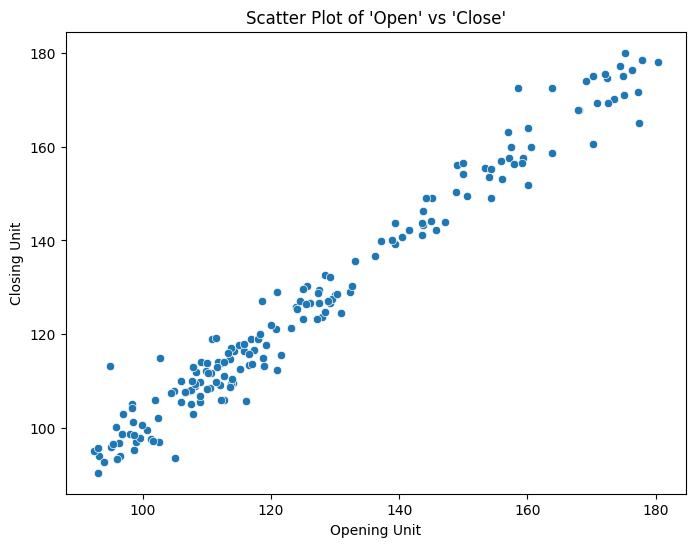

In [25]:
# Data Visualization

# Scatter plot between 'Open' and 'Close'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Open', y='Close', data=data)
plt.title("Scatter Plot of 'Open' vs 'Close'")
plt.xlabel("Opening Unit")
plt.ylabel("Closing Unit")
plt.show()


In [27]:

# Extract Date, Open, and Close columns
dates = data['Date']
open_prices = data['Open']
close_prices = data['Close']


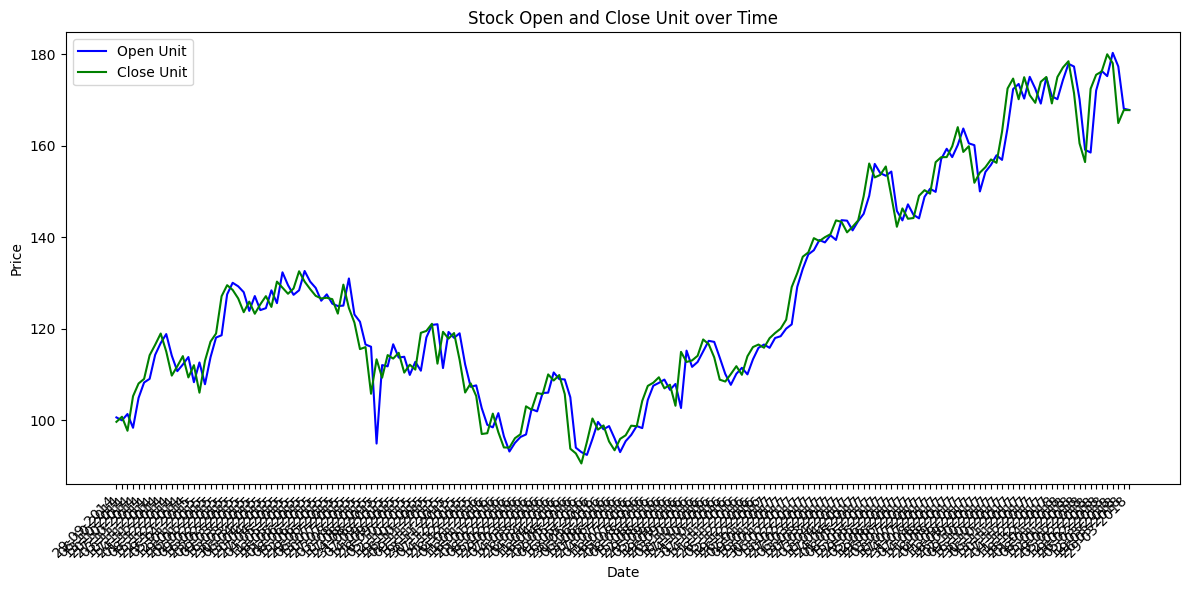

In [28]:
# Create a line plot for 'Open' and 'Close' Units
plt.figure(figsize=(12, 6))
plt.plot(dates, open_prices, label='Open Unit', color='blue')
plt.plot(dates, close_prices, label='Close Unit', color='green')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Open and Close Unit over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label overlapping

plt.show()

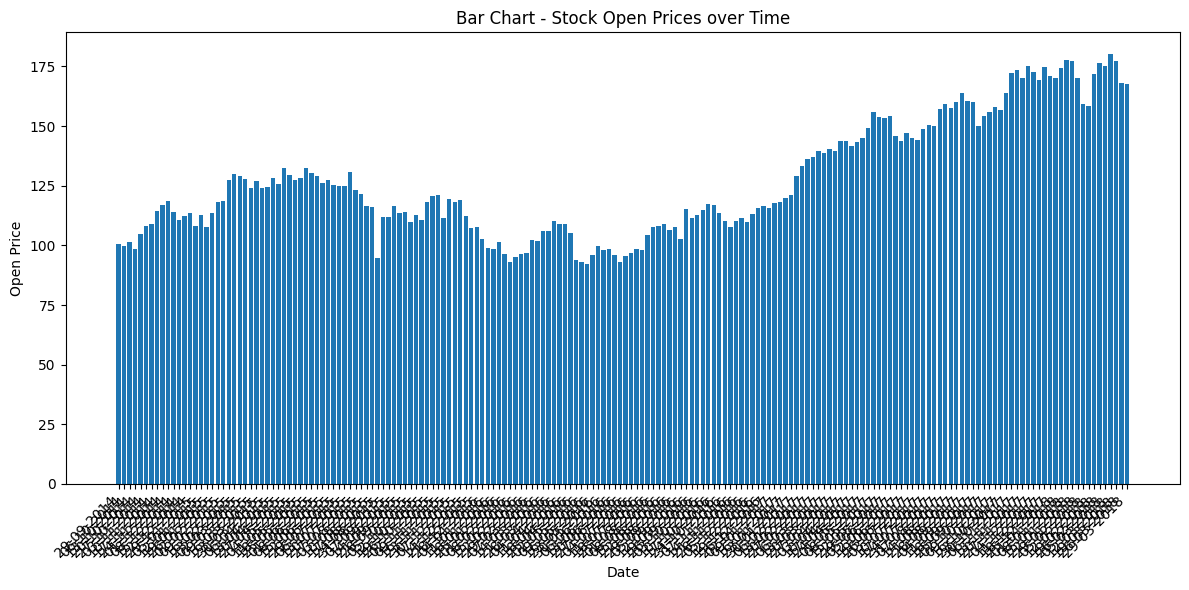

In [29]:
# Create a bar chart for 'Open' Unit
plt.figure(figsize=(12, 6))
plt.bar(dates, open_prices)
plt.xlabel('Date')
plt.ylabel('Open Unit')
plt.title('Bar Chart - Stock Open Unit over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

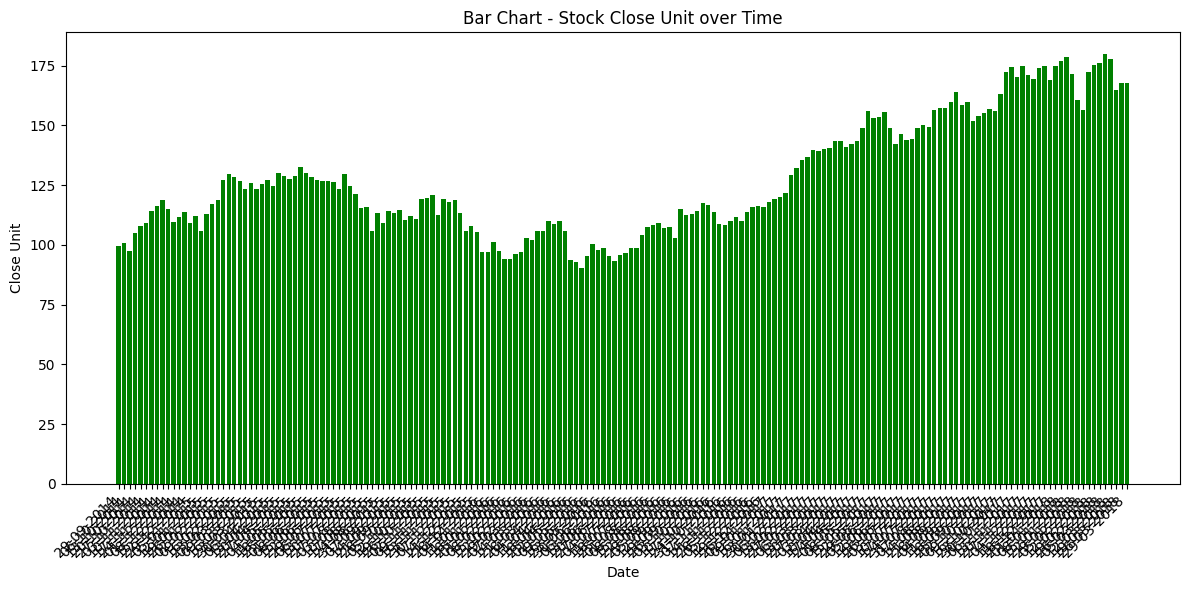

In [32]:
# Create a bar chart for 'Close' unit
plt.figure(figsize=(12, 6))
plt.bar(dates, close_prices, color='green')
plt.xlabel('Date')
plt.ylabel('Close Unit')
plt.title('Bar Chart - Stock Close Unit over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

<ipython-input-33-cce81330752e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


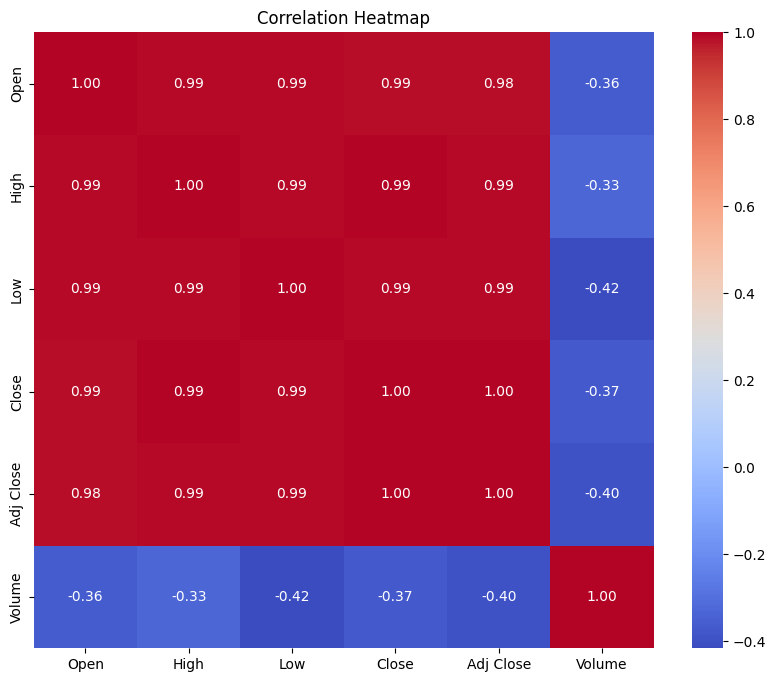

In [33]:
# Heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


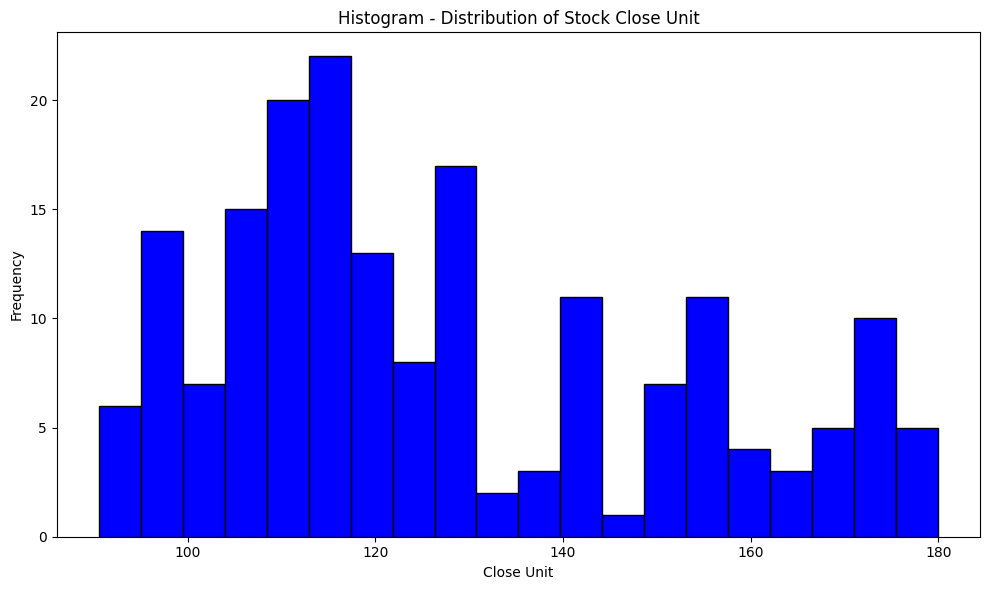

In [36]:
# Create a histogram for 'Close' Unit
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Close Unit')
plt.ylabel('Frequency')
plt.title('Histogram - Distribution of Stock Close Unit')
plt.tight_layout()

plt.show()

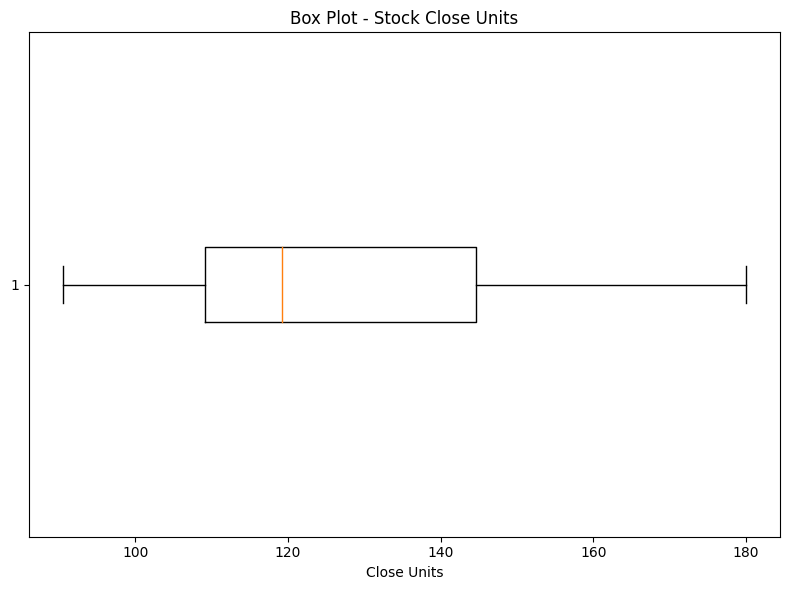

In [37]:
# Create a box plot for 'Close' Units
plt.figure(figsize=(8, 6))
plt.boxplot(data['Close'], vert=False)
plt.xlabel('Close Units')
plt.title('Box Plot - Stock Close Units')
plt.tight_layout()

plt.show()

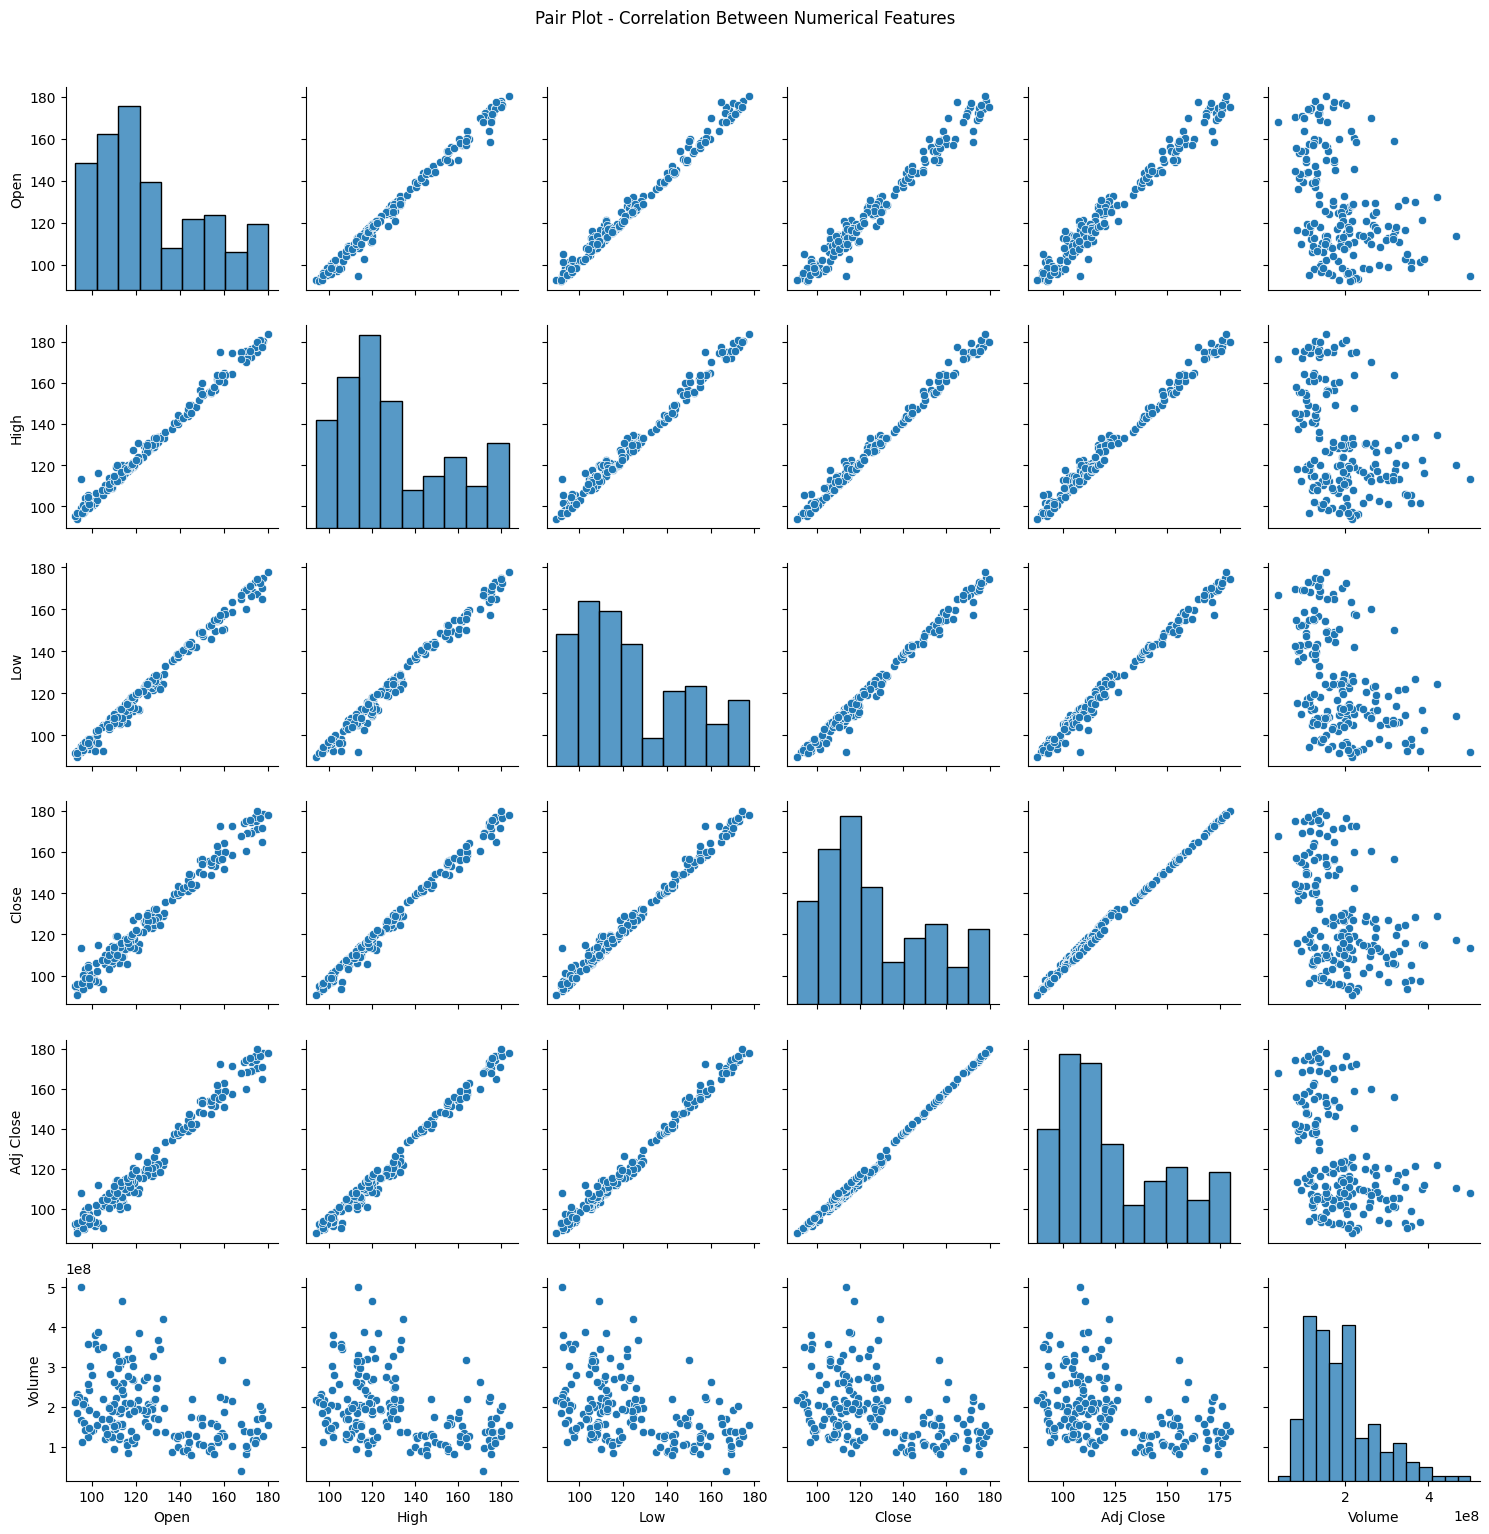

In [38]:
# Select numeric columns for pair plot
numeric_data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Create a pair plot
sns.pairplot(numeric_data)
plt.suptitle('Pair Plot - Correlation Between Numerical Features', y=1.02)
plt.tight_layout()

plt.show()


In [39]:
# Classification Model

# Spliting  data into features (X) and target (y)
X = data_scaled.drop(columns=['Close'])
y = data_scaled['Close']


In [40]:
X

,Open,High,Low,Adj Close,Volume
0,-1.090809,-1.192447,-1.090806,-1.185181,-0.593483
1,-1.117203,-1.123498,-1.079608,-1.144457,1.096591
2,-1.060291,-1.147977,-1.209425,-1.256724,2.058509
3,-1.184424,-0.996617,-1.083341,-0.979724,2.058424
4,-0.915126,-0.892582,-0.814584,-0.877729,0.358977
...,...,...,...,...,...
179,1.986522,2.043240,2.070828,2.194266,-0.628700
180,2.196021,2.186032,2.209768,2.117661,-0.437441
181,2.073539,1.940021,1.683867,1.606439,-0.225435
182,1.692068,1.845369,1.694235,1.717439,-0.406956


In [41]:
y

0       20
1       22
2       15
3       28
4       39
      ... 
179    178
180    176
181    159
182    160
183    160
Name: Close, Length: 184, dtype: int64

In [42]:
# Spliting  data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Creating the Logistic Regression model
classifier = LogisticRegression()

In [44]:
# Training the model using the training data
classifier.fit(X_train, y_train)

LogisticRegression()

In [45]:
#  Predicting on the test data
y_pred = classifier.predict(X_test)

In [46]:
# Mean
# The mean of the 'Close' column
mean_close = data['Close'].mean()
print("Mean of 'Close':", mean_close)

# The mean of the 'Open' column
mean_open = data['Open'].mean()
print("Mean of 'Open':", mean_open)


Mean of 'Close': 127.35266294565217
Mean of 'Open': 127.04024463043478


In [47]:
# Mode
# The mode of the 'Close' column
mode_close = data['Close'].mode().values[0]
print("Mode of 'Close':", mode_close)
# The mode of the 'Open' column
mode_open = data['Open'].mode().values[0]
print("Mode of 'Open':", mode_open)


Mode of 'Close': 118.93
Mode of 'Open': 93.0


In [48]:
# Calculating the  accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [49]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       0.0
          34       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       1.0
          51       0.00      0.00      0.00       1.0
          53       0.00      0.00      0.00       1.0
          57       0.00      0.00      0.00       0.0
          62       0.00      0.00      0.00       1.0
          65       0.00      0.00      0.00       0.0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [50]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
# In this Project , I  first load the data, explore it through summary statistics
# and visualize it using scatter plots and heatmaps.
# Then preprocess the data by dropping irrelevant columns,
# handling missing values, scaling features, and encoding the target variable.
# and Finally,  splited the dataset , build a Logistic Regression classifier,
# trained the model, and evaluate its performance on the test set.

                           # Thank You